<a href="https://colab.research.google.com/github/Advanced-Data-Science-TU-Berlin/Data-Science-Training-Python-Part-2/blob/main/notebooks/4_2_decision_tree_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification and Regression Trees (CART)
Classification and Regression Trees (CART) can be translated into a graph or set of rules for predictive classification. They help when logistic regression models cannot provide sufficient decision boundaries to predict the label. In addition, decision tree models are more interpretable as they simulate the human decision-making process. In addition, decision tree regression can capture non-linear relationships, thus allowing for more complex models. CART tries to split data into subsets so that each subset is as pure or homogeneous as possible.
> A pure node is one that results in perfect prediction.

In this exercise we are using the **Pima Indians Diabetes Dataset** which is applicable in the field of medical sciences. The objective of the dataset is to diagnostically predict `whether or not a patient has diabetes`, based on certain diagnostic measurements included in the dataset. 

> To read more about this data check [here](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)

Let's try to read the data and check out what the first few rows of this dataset look like:

In [1]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database", force=True)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: mahnaznmz
Your Kaggle Key: ··········


100%|██████████| 8.91k/8.91k [00:00<00:00, 5.42MB/s]

In [3]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
% matplotlib inline

df = pd.read_csv("/content/pima-indians-diabetes-database/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


After loading the data, we understand the structure & variables. Let's determine the target & feature variables (dependent & independent variables respectively)



In [4]:
# Split dataset in features and target variable
# Select Features 
X = df.iloc[:,:-1]
# Select Target variable or Label
y = df.Outcome

As part of any Machine Learning process we need to make sure that the data is clean before applying any model.
> Important Note: Decision Tree (DT) can handle both continuous and numeric variables. But since we are using Scikit Learn, we need to convert categorical values into numerical.

Luckily here we don't have any categorical value.

> Another Important Note: DT can automatically handle missing values and they are robust to outliers so we don't need to do anything regarding that.

Let's just look closer at the data:


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#Outcomes: 0    500
1    268
Name: Outcome, dtype: int64


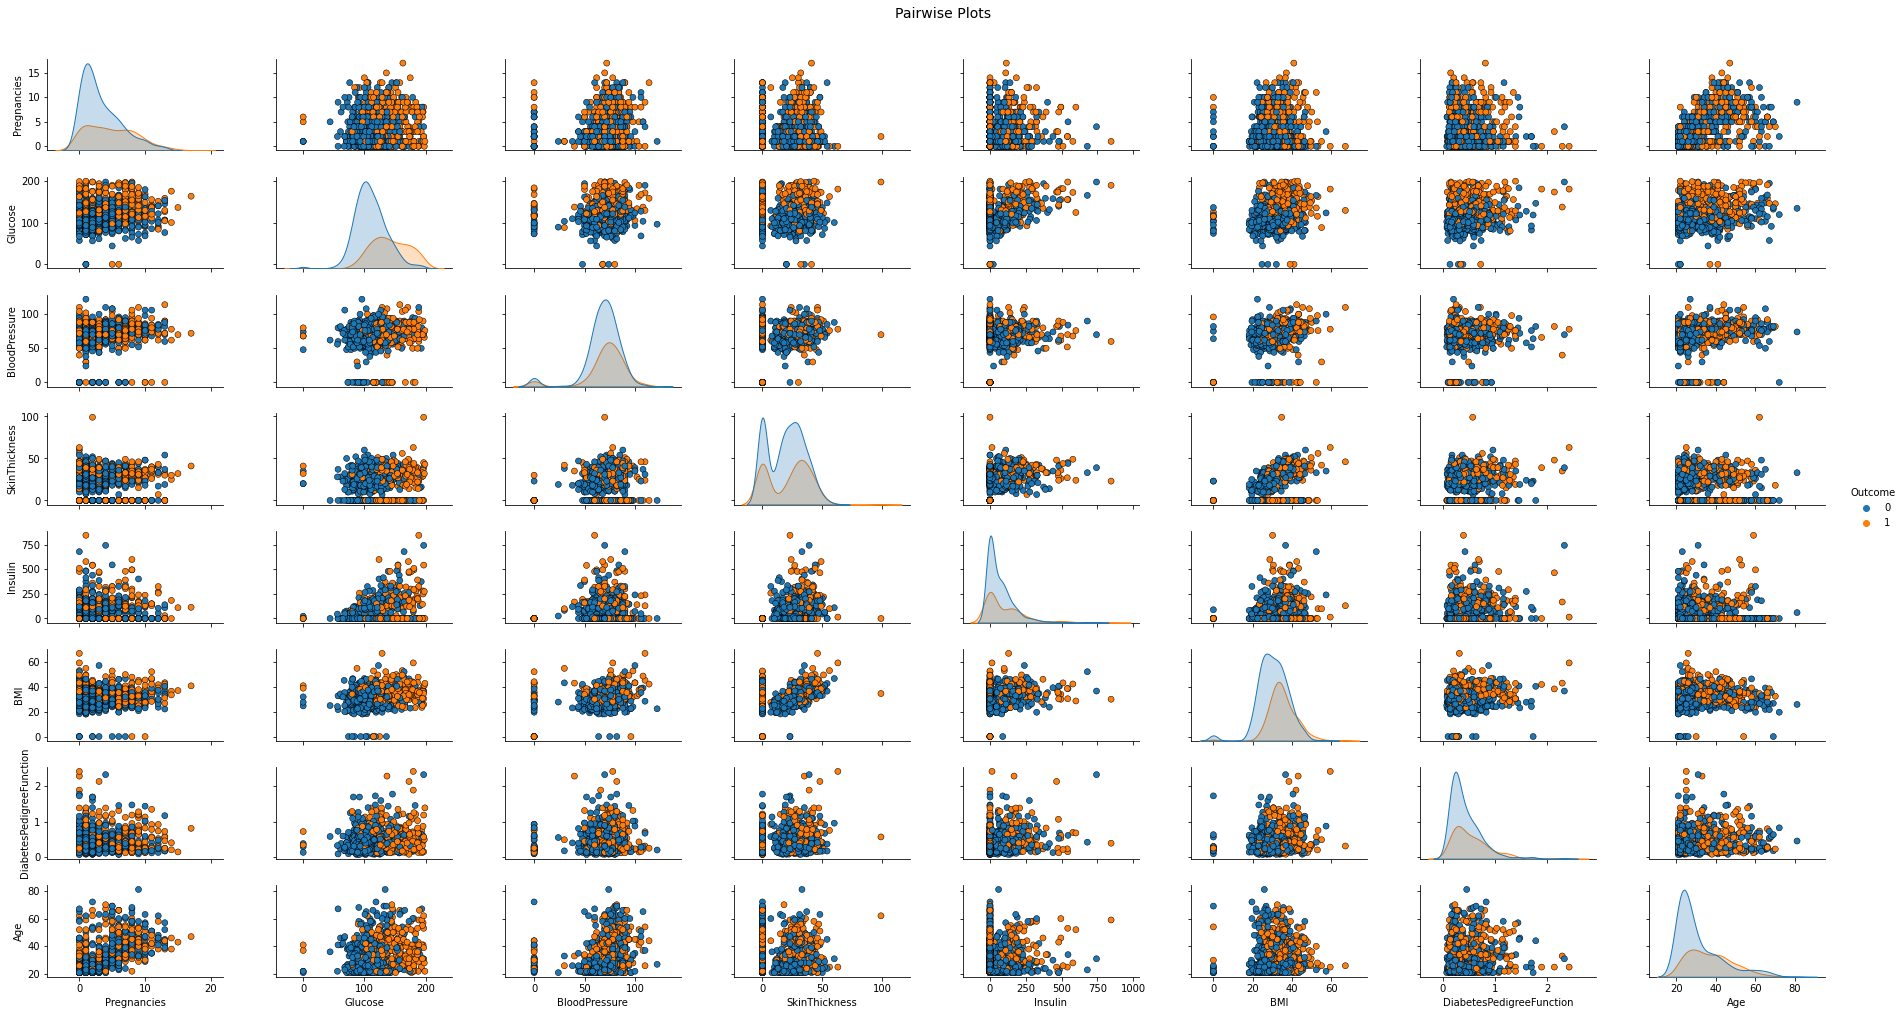

In [ ]:
# Distribution of the target value
print("#Outcomes:", df.Outcome.value_counts())
# Pair-wise Scatter Plots
pp = sns.pairplot(df, hue='Outcome', height=1.8,
                  aspect=1.8, plot_kws=dict(edgecolor="k",
                  linewidth=0.5), diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Pairwise Plots', fontsize=14)

As we can see out dataset is slightly imbalanced. Usually it can impact the performance of the DT (similar to most of other classifiers). They are techniques to deal with imbalanced classification. You can read more [here](https://machinelearningmastery.com/cost-sensitive-decision-trees-for-imbalanced-classification/)

From the pairwise plots we can see that the data is not linearly separable.
 
Now let’s divide the data into training & testing sets in the ratio of 70:30.

In [5]:
# Import
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

Let's perform the decision tree analysis using scikit learn:

In [16]:
# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree classifier object
clf = DecisionTreeClassifier(criterion='entropy')

# Train Decision Tree Classifier
clf = clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

Let's quickly lookt at the accuracy of the trained model on test data:

In [17]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Print the accuracy of the model on test data
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.70995670995671


Looks like our decision tree algorithm has an accuracy of ~71%. A value this high is usually considered good.

Now that we have created a decision tree, let’s see what it looks like when we visualise it. There are multiple ways to see the result of a DT.
1. Print Text Representation: Exporting Decision Tree to the text representation can be useful when working on applications whitout user interface or when we want to log information about the model into the text file. You can check details about export_text in the sklearn docs. But it maybe hard to read specially when the tree is big. Let's take a look:

In [18]:
# Import tree for decision tree models
from sklearn import tree

# Export text representation of the tree 
text_representation = tree.export_text(clf)
# Print Text Representation
print(text_representation)

|--- feature_1 <= 127.50
|   |--- feature_5 <= 26.45
|   |   |--- feature_5 <= 9.10
|   |   |   |--- feature_0 <= 7.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  7.50
|   |   |   |   |--- class: 1
|   |   |--- feature_5 >  9.10
|   |   |   |--- feature_6 <= 0.67
|   |   |   |   |--- class: 0
|   |   |   |--- feature_6 >  0.67
|   |   |   |   |--- feature_6 <= 0.71
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_6 >  0.71
|   |   |   |   |   |--- class: 0
|   |--- feature_5 >  26.45
|   |   |--- feature_7 <= 27.50
|   |   |   |--- feature_5 <= 30.95
|   |   |   |   |--- feature_0 <= 7.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_0 >  7.00
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_5 >  30.95
|   |   |   |   |--- feature_7 <= 22.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_7 >  22.50
|   |   |   |   |   |--- feature_2 <= 37.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_2 

2. Plot Tree with `plot_tree`: The plot_tree method was added to sklearn in version 0.21. It requires matplotlib to be installed. It allows us to easily produce figure of the tree (without intermediate exporting to graphviz) The more information about plot_tree arguments are in the docs. Let's see how it looks like:


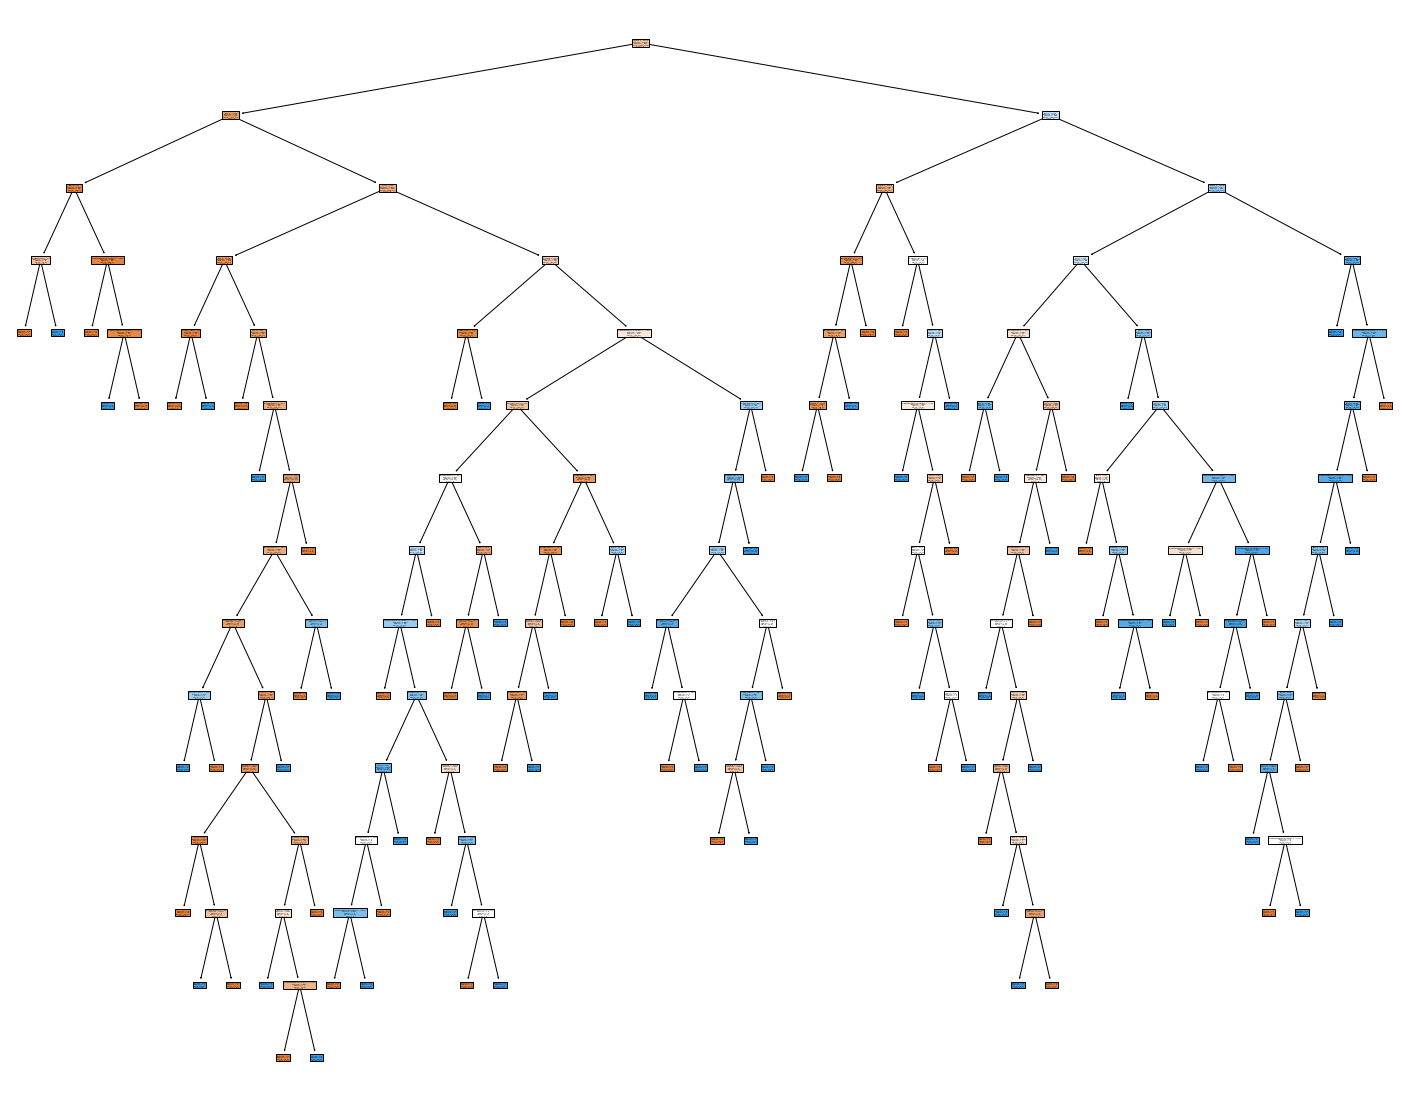

In [19]:
# Create a figure
fig = plt.figure(figsize=(25,20))
# Plot the tree
_ = tree.plot_tree(clf, 
                   feature_names=X.columns,
                   class_names=y.name,
                   filled=True)

We can save the figure into a .png file.

In [10]:
# Save the image
fig.savefig("decistion_tree.png")

3. Visualize Decision Tree with `graphviz`: To plot the tree first we need to export it to DOT format with export_graphviz method. Then we can plot it in the notebook or save to the file. This will provide us with a better view to look at bigger trees. Let's take a look:

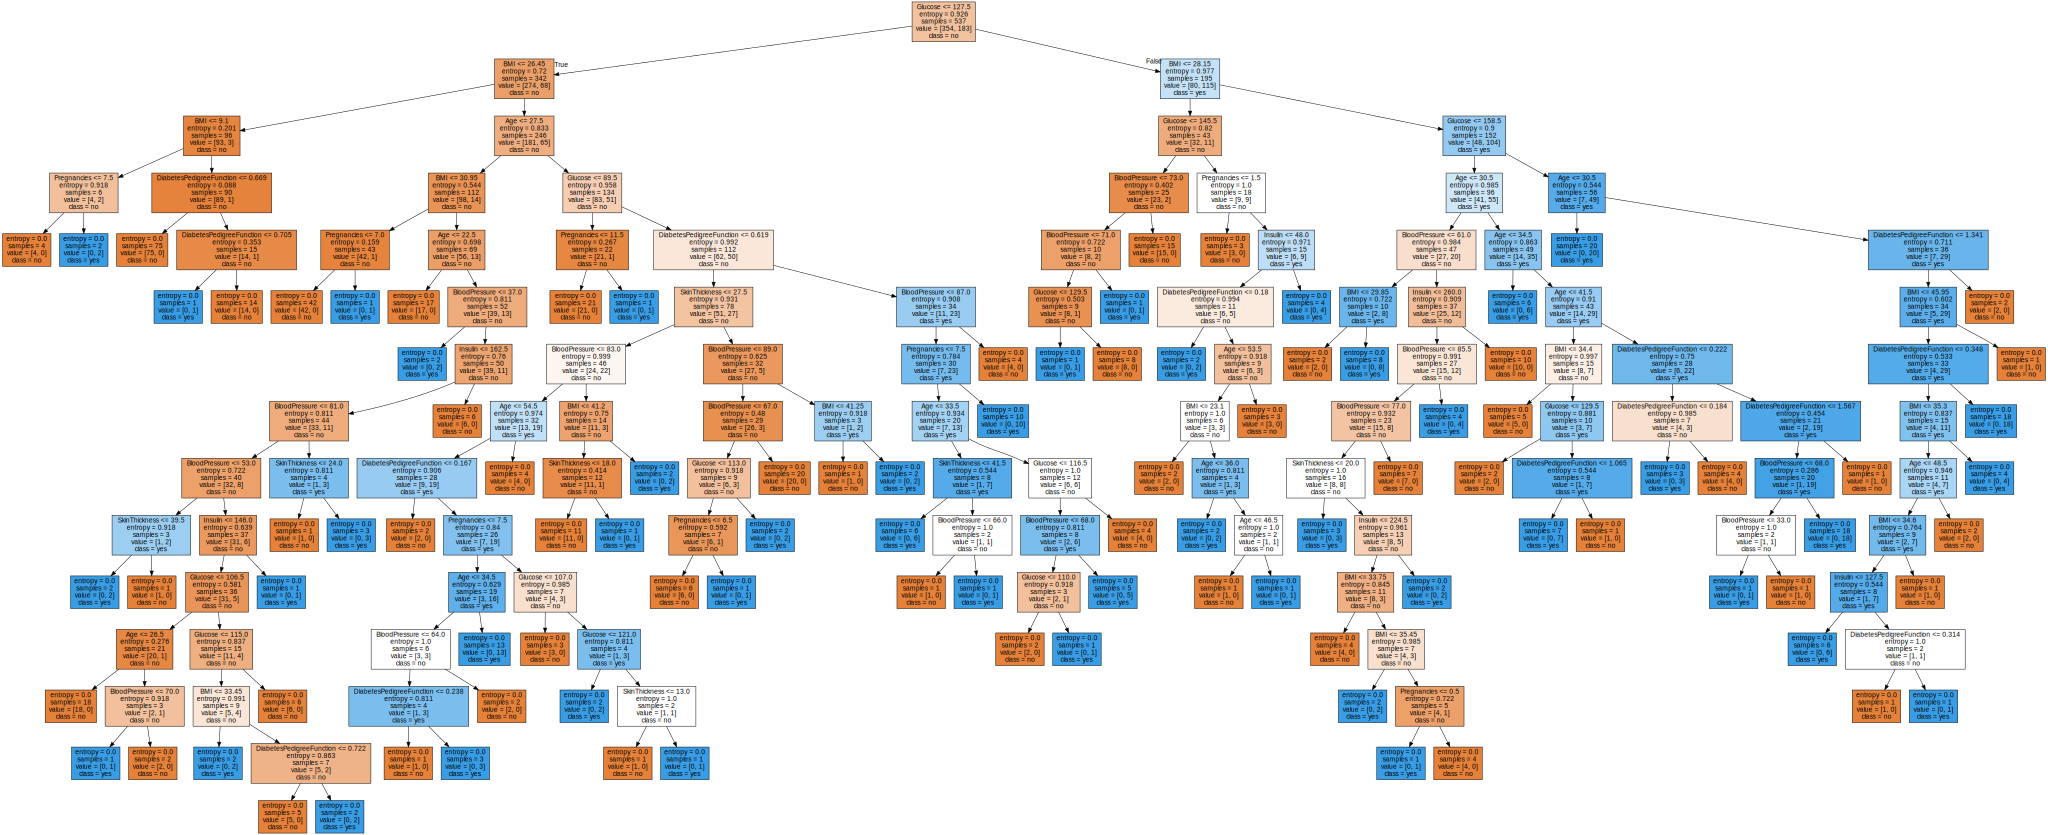

In [20]:
# Import graphviz
import graphviz
# Export graphviz from the tree
dot_data = tree.export_graphviz(clf,
                                out_file=None, 
                                feature_names=X.columns,
                                class_names=['no', 'yes'],
                                filled=True # paint nodes to indicate majority class for classification
                                )

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

Inside each node:
- The question that the decision tree asks to split based on the selected feature
- Criterion (Ex. gini or entropy): The function to measure the quality of a split
- Samples: The number of samples ended up in each node
- Value [X,Y]: The list tells you how many samples at the given node fall into each category (here 0 and 1)
- Class: shows the prediction a given node will make and it can be determined from the value list

In [ ]:
# Save the graphivz figure
graph.render("decision_tree_graphivz")

'decision_tree_graphivz.png'

> To read more about DT visualization you can check [this](https://mljar.com/blog/visualize-decision-tree/) link

## DT Evaluation
As you notice, in this extensive decision tree chart, each internal node has a decision rule that splits the data. But are all of these useful/pure?

Gini referred to as Gini ratio measures the impurity of the node in a decision tree. One can assume that a node is pure when all of its records belong to the same class. Such nodes are known as the leaf nodes.

In our outcome above, the complete decision tree is difficult to interpret due to the complexity of the outcome. Pruning/shortening a tree is essential to ease our understanding of the outcome and optimise it. This optimisation can be done in one of three ways:
- **criterion**: optional (default=”gini”) or Choose attribute selection measure.

  This parameter allows us to use the attribute selection measure.
- **splitter**: string, optional (default=”best”) or Split Strategy

  Allows the user to split strategy. You may choose “best” to choose the best - - split or “random” to choose the best random split.
- **max_depth**: int or None, optional (default=None) or Maximum Depth of a Tree

  This parameter determines the maximum depth of the tree. A higher value of this variable causes overfitting and a lower value causes underfitting.

>According to the paper “Theoretical comparison between the Gini Index and Information Gain criteria”, the frequency of agreement/disagreement of the Gini Index and the Information Gain was only 2% of all cases, so for all intents and purposes you can pretty much use either, but the only difference is entropy might be a little slower to compute because it requires you to compute a logarithmic function.

> More information regarding DT parameters is [here](https://towardsdatascience.com/how-to-tune-a-decision-tree-f03721801680)

In our case, we will be varying the maximum depth of the tree as a control variable for pre-pruning. Let’s try max_depth=3.

In [22]:
# Create Decision Tree classifier object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
# Train Decision Tree Classifier
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7705627705627706


On Pre-pruning, the accuracy of the decision tree algorithm increased to 77.05%, which is clearly better than the previous model.

Let's look at the DT:

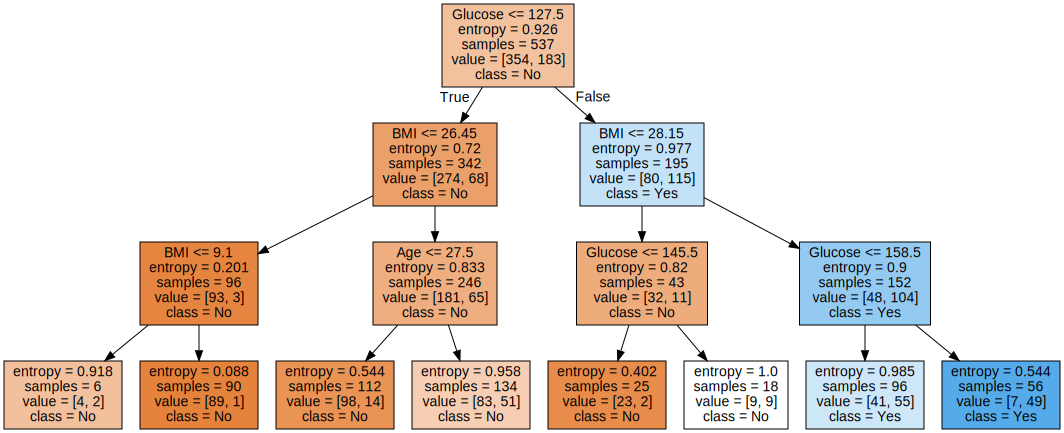

In [23]:
# DOT data
dot_data = tree.export_graphviz(clf,
                                out_file=None, 
                                feature_names=X.columns,
                                class_names=['No', 'Yes'],
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

## Hyperparameter Tuning in DT
Hyperparameters are model parameters whose values are set before training. Why should we tune the hyperparameters of a model? Because we don’t really know their optimal values in advance. A model with different hyperparameters is, actually, a different model so it may have a lower performance.If the model has several hyperparameters, we need to find the best combination of values of the hyperparameters searching in a multi-dimensional space. That’s why hyperparameter tuning, which is the process of finding the right values of the hyperparameters, is a very complex and time-expensive task. 
### Grid Search
Grid search is the simplest algorithm for hyperparameter tuning. Basically, we divide the domain of the hyperparameters into a discrete grid. Then, we try every combination of values of this grid, calculating some performance metrics using cross-validation. The point of the grid that maximizes the average value in cross-validation, is the optimal combination of values for the hyperparameters.
> To read more check [here](https://www.yourdatateacher.com/2021/05/19/hyperparameter-tuning-grid-search-and-random-search/)

let's write some helper functions:

In [24]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", metrics.accuracy_score(y_train, dt_classifier.predict(X_train)))
    fig, ax = plt.subplots(1, 2, figsize=(20,5))
    ax[0].set_title('Train Confusion Matrix')
    metrics.ConfusionMatrixDisplay.from_predictions(y_train, dt_classifier.predict(X_train), cmap='ocean', ax=ax[0])
    print("-"*50)
    print("Test Accuracy :", metrics.accuracy_score(y_test, dt_classifier.predict(X_test)))
    ax[1].set_title("Test Confusion Matrix")
    metrics.ConfusionMatrixDisplay.from_predictions(y_test, dt_classifier.predict(X_test), cmap='ocean', ax=ax[1])

def plot_dt_graph(clf):
  # DOT data
  dot_data = tree.export_graphviz(clf,
                                  out_file=None, 
                                  feature_names=X.columns,
                                  class_names=y.name,
                                  filled=True)

  # Draw graph
  graph = graphviz.Source(dot_data, format="png") 
  return graph

In [25]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'criterion': ["gini", "entropy"]
}
dt = DecisionTreeClassifier(random_state=1)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [26]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits
CPU times: user 211 ms, sys: 52.7 ms, total: 263 ms
Wall time: 1.89 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20]},
             scoring='accuracy', verbose=1)

Let's see the results:

In [29]:
score_df = pd.DataFrame(grid_search.cv_results_)
print("Scores DataFrame: -----------")
display(score_df.head())

# Look at top-5 results based on the mean_test_score
print("Top-5 Scores: -----------")
display(score_df.nlargest(5,"mean_test_score"))

# Look at the best estimator
dt_best = grid_search.best_estimator_
print("Best Scores: -----------")
display(dt_best)

Scores DataFrame: -----------


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005243,0.000190,0.002671,0.000050,gini,2,"{'criterion': 'gini', 'max_depth': 2}",0.718519,0.731343,0.716418,0.738806,0.726271,0.009220,3
1,0.005277,0.000420,0.002505,0.000091,gini,3,"{'criterion': 'gini', 'max_depth': 3}",0.725926,0.731343,0.708955,0.738806,0.726258,0.010986,5
2,0.007961,0.002052,0.004518,0.002562,gini,5,"{'criterion': 'gini', 'max_depth': 5}",0.711111,0.738806,0.731343,0.746269,0.731882,0.013102,2
3,0.009392,0.003331,0.004108,0.002472,gini,10,"{'criterion': 'gini', 'max_depth': 10}",0.651852,0.656716,0.723881,0.746269,0.694679,0.041199,7
4,0.007455,0.002357,0.004052,0.002278,gini,20,"{'criterion': 'gini', 'max_depth': 20}",0.696296,0.626866,0.694030,0.708955,0.681537,0.032073,10


Top-5 Scores: -----------


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
7,0.006407,0.000321,0.003798,0.001888,entropy,5,"{'criterion': 'entropy', 'max_depth': 5}",0.740741,0.716418,0.753731,0.746269,0.739290,0.013987,1
2,0.007961,0.002052,0.004518,0.002562,gini,5,"{'criterion': 'gini', 'max_depth': 5}",0.711111,0.738806,0.731343,0.746269,0.731882,0.013102,2
0,0.005243,0.000190,0.002671,0.000050,gini,2,"{'criterion': 'gini', 'max_depth': 2}",0.718519,0.731343,0.716418,0.738806,0.726271,0.009220,3
5,0.006967,0.003044,0.002802,0.000069,entropy,2,"{'criterion': 'entropy', 'max_depth': 2}",0.718519,0.731343,0.716418,0.738806,0.726271,0.009220,3
1,0.005277,0.000420,0.002505,0.000091,gini,3,"{'criterion': 'gini', 'max_depth': 3}",0.725926,0.731343,0.708955,0.738806,0.726258,0.010986,5


Best Scores: -----------


DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=1)

Now that we have the best parameter let's see its tree and performance:

Train Accuracy : 0.8324022346368715
--------------------------------------------------
Test Accuracy : 0.7662337662337663


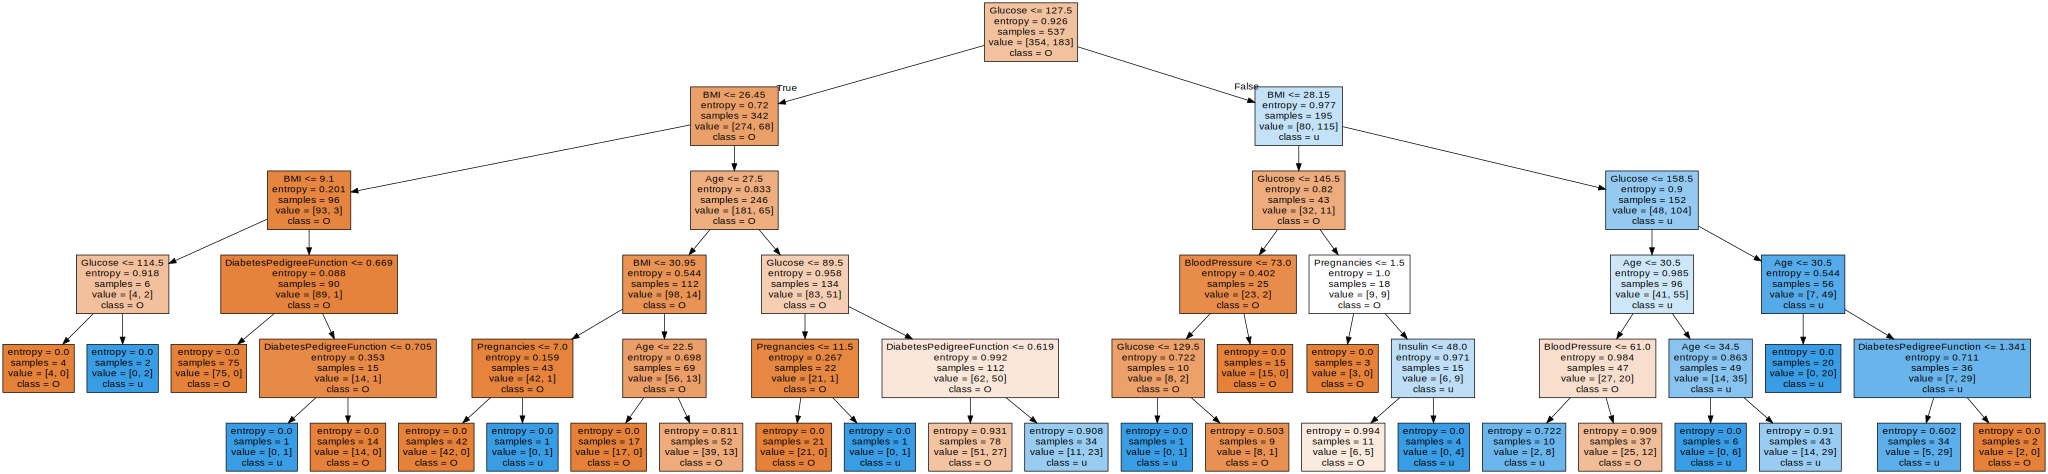

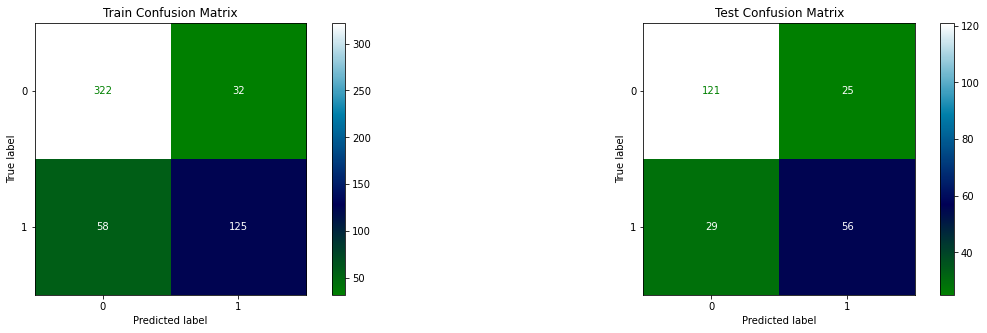

In [ ]:
evaluate_model(dt_best)
plot_dt_graph(dt_best)

Useful links:
- https://www.kaggle.com/code/gauravduttakiit/hyperparameter-tuning-in-decision-trees/notebook
- https://www.kaggle.com/code/mamun18/decision-tree-practice-with-car-evaluation-dataset
- https://www.springboard.com/blog/data-science/decision-tree-implementation-in-python/
- https://towardsdatascience.com/id3-decision-tree-classifier-from-scratch-in-python-b38ef145fd90